In [13]:
from vgbot_lib import *
import pymem
import pymem.process
import ctypes
import psutil

In [14]:
my_pid = None
pids = psutil.pids()
for pid in pids:
    ps = psutil.Process(pid)
    # find process by .exe name, but note that there might be more instances of solitaire.exe
    if "Fallout76.exe" in ps.name():
        my_pid = ps.pid
        print( "%s running with pid: %d" % (ps.name(), ps.pid) )

base_address = pymem.process.base_address(pid)

Fallout76.exe running with pid: 9744


AttributeError: module 'pymem.process' has no attribute 'base_address'

In [7]:
#Startup routines. Check to make sure NES emulator is running and that the
#screen capture function can collect data.

In [4]:
def F76_preprocess(image):
    return np.average(np.array(image), axis=2)

def movement(key_index):
    keys = [ctypes_functions.KEY_W,
        ctypes_functions.KEY_S,
        ctypes_functions.KEY_A,
        ctypes_functions.KEY_D]
    ctypes_functions.SendInput(ctypes_functions.Keyboard(keys[key_index]))
    time.sleep(0.2)
    ctypes_functions.SendInput(ctypes_functions.Keyboard(keys[key_index]))
    time.sleep(0.2)

def push_button(key_index):
    keys = [0x57,
        0x53,
        0x41,
        0x44]
    win32api.keybd_event(keys[key_index], 0, 0, 0)
    time.sleep(.15)
    win32api.keybd_event(keys[key_index], 0, win32con.KEYEVENTF_KEYUP, 0) 

Shape:  (1080, 1920)


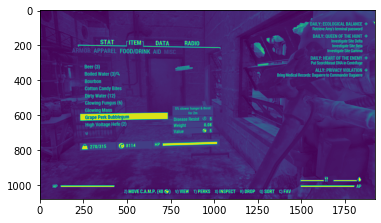

In [5]:
NESwindow = findWindowHandle('Fallout76')
try:
    coords = windowCoordinates(NESwindow[0][0])
    image = screenGrab(coords)
except TypeError:
    print ('Window handle nonsensical. Check window-finding routine.')

example = F76_preprocess(image)
plt.imshow(example)
print ('Shape: ', example.shape)

In [18]:
def act_on(key_index):
    keys = [ctypes_functions.KEY_W,
            ctypes_functions.KEY_S,
            ctypes_functions.KEY_A,
            ctypes_functions.KEY_D,
            ctypes_functions.VK_NUMPAD4,
            ctypes_functions.VK_NUMPAD6,
            ctypes_functions.VK_NUMPAD8,
            ctypes_functions.VK_NUMPAD2]  
    ctypes_functions.SendInput(ctypes_functions.Keyboard(keys[key_index]))

time.sleep(10)
for i in range(100):
    act_on(0)

In [ ]:
ww